<a href="https://colab.research.google.com/github/carlomigs/gym-anytrading/blob/master/migs_anytrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AminHP/gym-anytrading
%cd gym-anytrading
!pip install -e .

Cloning into 'gym-anytrading'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31 (delta 4), reused 28 (delta 4), pack-reused 0
Unpacking objects: 100% (31/31), done.
/content/gym-anytrading
Obtaining file:///content/gym-anytrading
  Running setup.py develop for gym-anytrading


info: {'total_reward': 21.299999999984106, 'total_profit': 0.9897447326520974, 'position': 0}


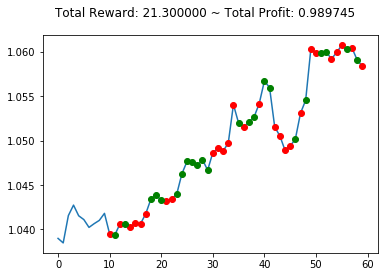

In [2]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [12]:
!apt-get update && sudo apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [74.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sour

In [13]:
from stable_baselines import HER, DQN
from stable_baselines.her import GoalSelectionStrategy, HERGoalEnvWrapper

model_class = DQN  # works also with SAC, DDPG and TD3

#env = BitFlippingEnv(N_BITS, continuous=model_class in [DDPG, SAC, TD3], max_steps=N_BITS)
env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)

# Available strategies (cf paper): future, final, episode, random
goal_selection_strategy = 'future' # equivalent to GoalSelectionStrategy.FUTURE

# Wrap the model
model = HER('MlpPolicy', env, model_class, n_sampled_goal=4, goal_selection_strategy=goal_selection_strategy,
                                                verbose=1)
# Train the model
model.learn(1000)

model.save("./her_bit_env")

# WARNING: you must pass an env
# or wrap your environment with HERGoalEnvWrapper to use the predict method
model = HER.load('./her_bit_env', env=env)

obs = env.reset()
while True:
    action = model.predict(obs)
    obs, reward, done, info = env.step(action)

    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

ImportError: ignored

info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


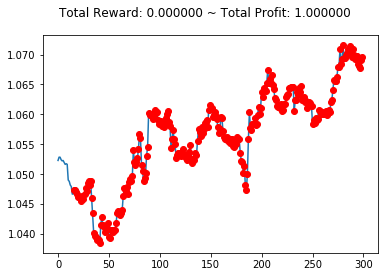

In [70]:
import gym
#from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN

env = gym.make('forex-v0', frame_bound=(16, 300), window_size=16, unit_side='right')

model = DQN(MlpPolicy, env, verbose=0)
model.learn(1000)
#model.save("dqn_env")

#model = DQN.load('dqn_env', env=env)

obs = env.reset()
while True:
    action = model.predict(obs)
    #action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [61]:
env.observation_space

Box(8, 2)